# IMDB Sentiment Classifier: NN with Embedding Layer

## Load the data

In [12]:
from keras.datasets import imdb
from keras import preprocessing


max_features = 100000 #number of words to consider as a feature
maxlen = 20 #cut off reviews after only 20 words

#load preprocessed, vectorized data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

#turn the list of integers into 2-d tensor of shape (samples, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)


## NN Model

In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
#embedding layer: input 2-d tensor of samples/feratures and dimension of embedding (8 in our case)
# returns 3-d tensor of shape(samples, sequence length and dimensionality of embedding)
model.add(Embedding(max_features, 8, input_length = maxlen))
#Flattens the 3d tensor output of Embedding layer into 2d tensor of shape(samples, 8 * maxlen)
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             800000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 800,161
Trainable params: 800,161
Non-trainable params: 0
_________________________________________________________________


## Compile and Fit the Model

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 10,
                   batch_size = 32,
                   validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
12288/20000 [=================>............] - ETA: 1s - loss: 0.6872 - acc: 0.5646

# Plot the Graph

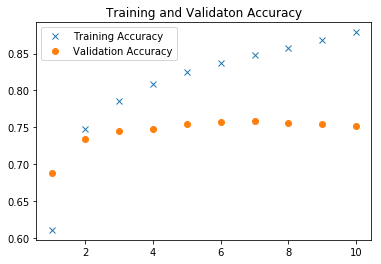

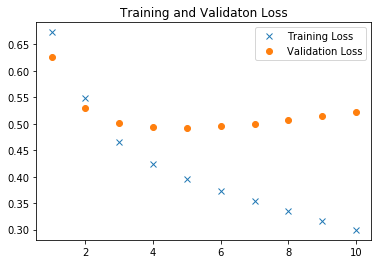

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'x', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'o', label = 'Validation Accuracy')
plt.title("Training and Validaton Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'x', label = 'Training Loss')
plt.plot(epochs, val_loss, 'o', label = 'Validation Loss')
plt.title("Training and Validaton Loss")
plt.legend()

plt.show()